# Imports 

In [367]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [368]:
meta_data_df = pd.read_csv('/Users/darylwanji/Desktop/Computer_Vision_Capstone_Project/data/HAM10000_metadata.csv')
meta_data_df.sample(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization
101,HAM_0002985,ISIC_0025063,bkl,histo,85.0,male,face
3548,HAM_0003371,ISIC_0030957,nv,follow_up,35.0,female,back
6618,HAM_0006906,ISIC_0031254,nv,follow_up,50.0,male,upper extremity
523,HAM_0003275,ISIC_0032116,bkl,histo,75.0,female,chest
7881,HAM_0006334,ISIC_0032779,nv,histo,40.0,female,back


In [369]:
meta_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


>  MetaData shows the dataset has 10,015 images  
>  Age is the only Numerical column          
>  Age has some nulls values as the Non-null count doesn't match the size         
>  Age is a float, will be converted to Int     

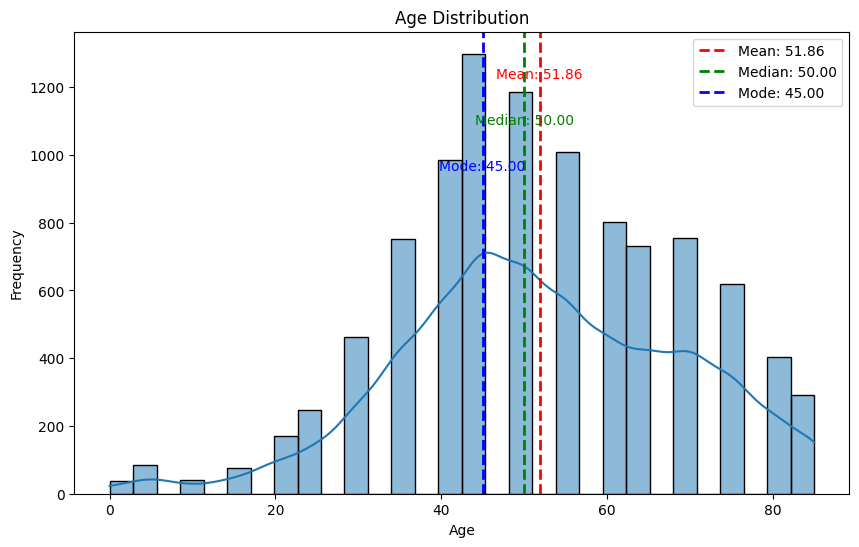

In [370]:
ages = meta_data_df['age']

plt.figure(figsize=(10, 6))
sns.histplot(ages, bins=30, kde=True)

# Adding Vertical Lines for Mean, Median and Mode
plt.axvline(ages.mean(), color='r', linestyle='--', linewidth=2, label=f'Mean: {ages.mean():.2f}')
plt.axvline(ages.median(), color='g', linestyle='--', linewidth=2, label=f'Median: {ages.median():.2f}')
plt.axvline(ages.mode()[0], color='b', linestyle='--', linewidth=2, label=f'Mode: {ages.mode()[0]:.2f}')

# Annotate Actual values
plt.text(ages.mean(), plt.ylim()[1]*0.9, f'Mean: {ages.mean():.2f}', color='r', ha='center')
plt.text(ages.median(), plt.ylim()[1]*0.8, f'Median: {ages.median():.2f}', color='g', ha='center')
plt.text(ages.mode()[0], plt.ylim()[1]*0.7, f'Mode: {ages.mode()[0]:.2f}', color='b', ha='center')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

plt.savefig('/Users/darylwanji/Desktop/Computer_Vision_Capstone_Project/Advancing-Automated-Skin-Cancer-Detection/Assets/EdaPlots/AgeDistribution_1')
plt.show()


> Highest Mode Age is 45.       
> As per the relationship between Mean, Median and Mode, Age is Right Skewed.       
> Mean > Median > Mode

In [371]:
# Convert Age column to Int 
meta_data_df['age'] = meta_data_df['age'].astype('Int64')

In [372]:
meta_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   lesion_id     10015 non-null  object
 1   image_id      10015 non-null  object
 2   dx            10015 non-null  object
 3   dx_type       10015 non-null  object
 4   age           9958 non-null   Int64 
 5   sex           10015 non-null  object
 6   localization  10015 non-null  object
dtypes: Int64(1), object(6)
memory usage: 557.6+ KB


Age's type is now Int64 

In [373]:
meta_data_df.shape

(10015, 7)

10015 different images characterized by 7 distinct aspects.

In [374]:
meta_data_df.isnull().sum() * 100 / meta_data_df.shape[0]

lesion_id       0.000000
image_id        0.000000
dx              0.000000
dx_type         0.000000
age             0.569146
sex             0.000000
localization    0.000000
dtype: float64

> About 0.6% of Age column is null

In [375]:
meta_data_df.describe()

,age
count,9958.0
mean,51.863828
std,16.968614
min,0.0
25%,40.0
50%,50.0
75%,65.0
max,85.0


> Mean Age of patients is about 52 yo.(This is without 0.6% null values)
> Null values in Age will be imputed with the Mean of the Ages


In [376]:
meta_data_df['age'].fillna(meta_data_df['age'].mean().round(0), inplace=True)

In [377]:
meta_data_df.describe()

,age
count,10015.0
mean,51.864603
std,16.920255
min,0.0
25%,40.0
50%,50.0
75%,65.0
max,85.0


> Mean still about 52 yo

In [378]:
meta_data_df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

> No null values

In [379]:
meta_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   lesion_id     10015 non-null  object
 1   image_id      10015 non-null  object
 2   dx            10015 non-null  object
 3   dx_type       10015 non-null  object
 4   age           10015 non-null  Int64 
 5   sex           10015 non-null  object
 6   localization  10015 non-null  object
dtypes: Int64(1), object(6)
memory usage: 557.6+ KB


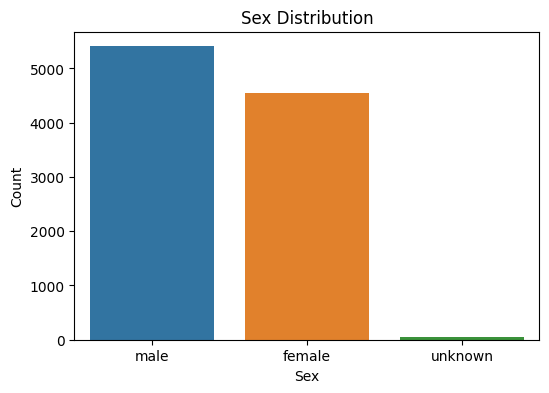

In [380]:
# Sex distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=meta_data_df)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.savefig('/Users/darylwanji/Desktop/Computer_Vision_Capstone_Project/Advancing-Automated-Skin-Cancer-Detection/Assets/EdaPlots/SexDistribution')
plt.show()

> There is some Class imbalance, There are more male observations than Female.      
> In addition to that, there are some observations whose Sex is unknown

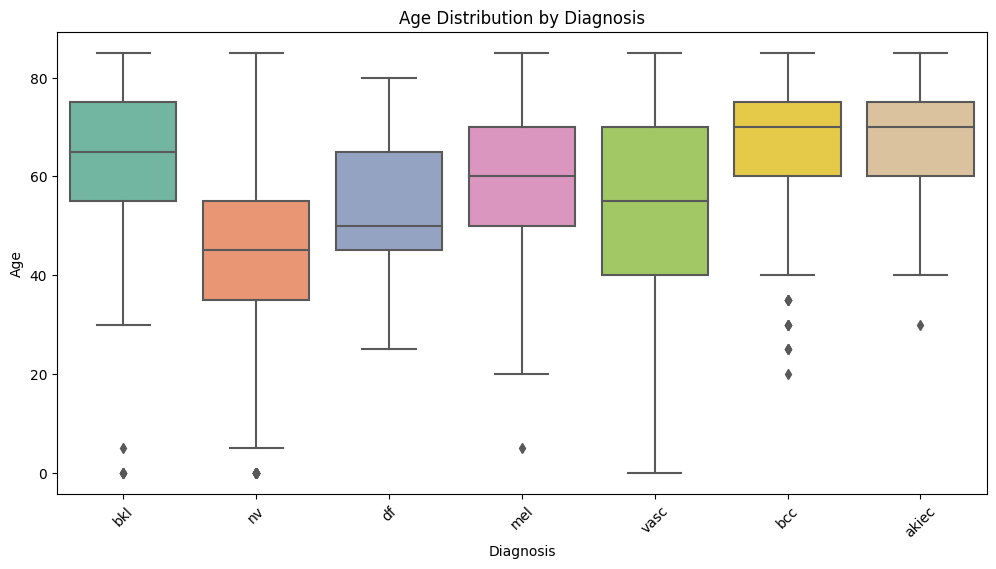

In [381]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='dx',
            y='age',
            data=meta_data_df,
            palette="Set2")
plt.title('Age Distribution by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.savefig('/Users/darylwanji/Desktop/Computer_Vision_Capstone_Project/Advancing-Automated-Skin-Cancer-Detection/Assets/EdaPlots/AgeDistribution_by_Diagnosis')
plt.show()

> BKL, NV, MEL, VASC are evenly distributed, i.e They follow a normal distribution      
> DF, BCC and AKIEC are skewed

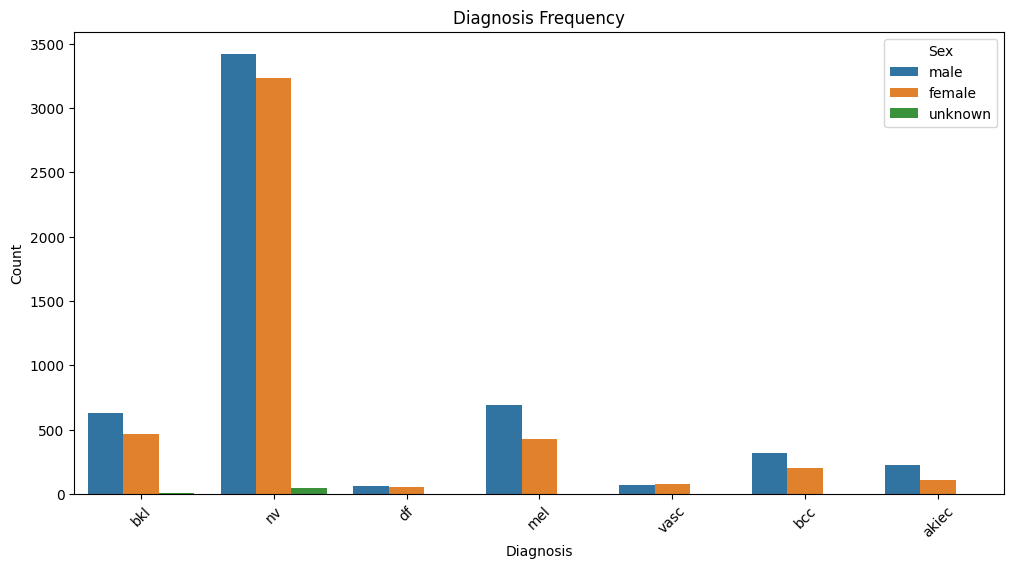

In [382]:
# Sex vs. Diagnosis
plt.figure(figsize=(12, 6))
sns.countplot(x='dx', hue='sex', data=meta_data_df)
plt.title('Diagnosis Frequency')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.savefig('/Users/darylwanji/Desktop/Computer_Vision_Capstone_Project/Advancing-Automated-Skin-Cancer-Detection/Assets/EdaPlots/Diagnosis_Frequency')
plt.show()

> Overall, there are more male Diagnosed for all Diagnosis but `VASC`

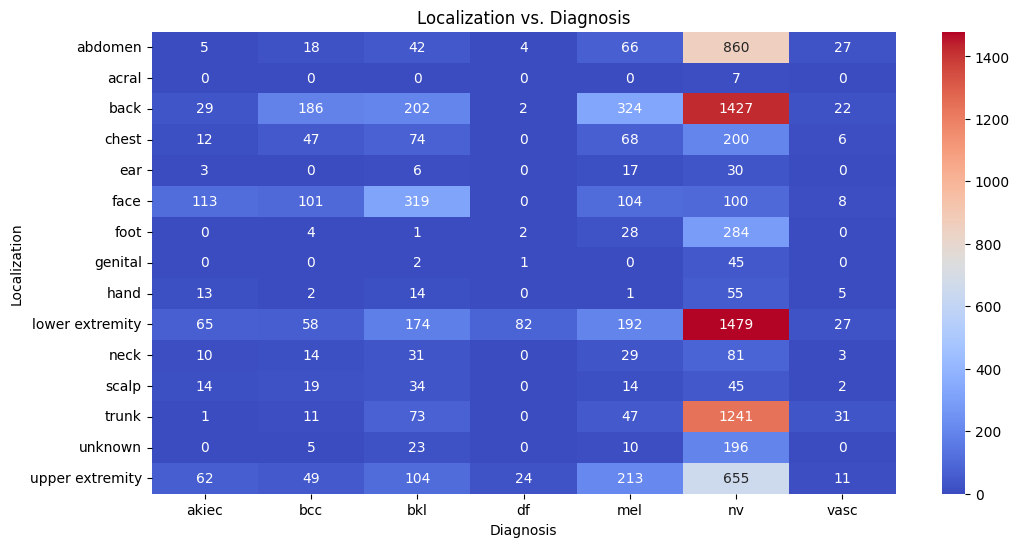

In [383]:
# Localization vs. Diagnosis
plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(meta_data_df['localization'], meta_data_df['dx']), annot=True, fmt="d", cmap="coolwarm")
plt.title('Localization vs. Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Localization')
plt.savefig('/Users/darylwanji/Desktop/Computer_Vision_Capstone_Project/Advancing-Automated-Skin-Cancer-Detection/Assets/EdaPlots/Localization_Diagnosis')
plt.show()

> High Prevalalence of NV on the back, trunk, abdomen and lower extremity (1427, 1241,860 1479). This means NV is more likely to be diagnosed on central body parts.  
> High Prevalence of BKL on the face. It means BKL is more likely to be diagnosed on a face than any part of the body.          
> MEL is more likely to be diagnosed on the back.